<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Random Forest Model

### Initializations

In [335]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
%matplotlib inline

In [55]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [56]:
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [57]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Random Forest

In [58]:
clf = RandomForestClassifier()

In [59]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
clf.score(X_test_scaled, y_test)

0.98541666666666672

In [61]:
predictions = clf.predict(X_test_scaled)

In [62]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.998437337223
Test Accuracy  ::  0.985416666667


In [63]:
print(confusion_matrix(y_test, predictions))

[[1840    7]
 [  28  525]]


In [64]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1847
          1       0.99      0.95      0.97       553

avg / total       0.99      0.99      0.99      2400



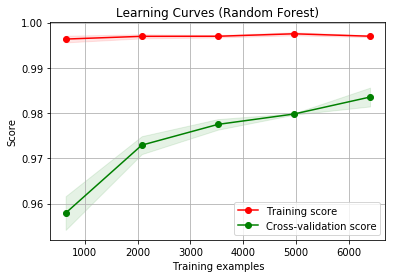

In [65]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Random Forest w/o Department

In [66]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [67]:
clf = RandomForestClassifier()

In [68]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
clf.score(X_test_scaled, y_test)

0.98708333333333331

In [116]:
predictions = clf.predict(X_test_scaled)

In [117]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.998020627149
Test Accuracy  ::  0.987083333333


In [118]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1840    7]
 [  24  529]]


In [119]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1803,   44],
       [  49,  504]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}}


In [120]:
cm_dict.item().update({'random_forest':{'cm': cm, 'label': 'Random Forest' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1803,   44],
       [  49,  504]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1840,    7],
       [  24,  529]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}}


In [73]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1847
          1       0.99      0.96      0.97       553

avg / total       0.99      0.99      0.99      2400



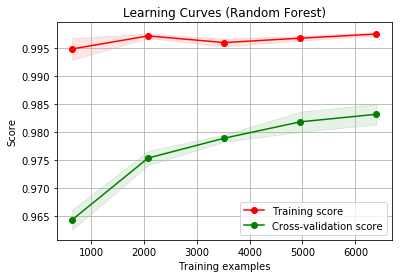

In [74]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using GridSearchCV

In [332]:
from sklearn.model_selection import GridSearchCV

In [333]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [334]:
clf = RandomForestClassifier()

In [336]:
param_space = {'n_estimators':[100,200,300,400,500], 'criterion':['gini', 'entropy'], 'max_features':['log2', 'sqrt', 0.2, 0.4, 0.6, 0.8, 1.0]}

In [337]:
gs = GridSearchCV(clf, param_space, cv=5)

In [338]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_features': ['log2', 'sqrt', 0.2, 0.4, 0.6, 0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


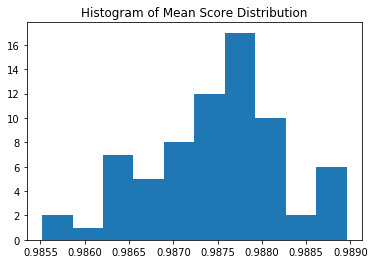

In [339]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [340]:
gs.best_score_

0.98895718303989999

In [341]:
gs.best_params_

{'criterion': 'gini', 'max_features': 0.6, 'n_estimators': 300}

In [342]:
clf = RandomForestClassifier(criterion='gini', max_features=0.6, n_estimators=300)

In [343]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [344]:
clf.score(X_test_scaled, y_test)

0.99124999999999996

In [345]:
predictions = clf.predict(X_test_scaled)

In [346]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.99125


In [347]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1844    3]
 [  18  535]]


In [317]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1821,   26],
       [  57,  496]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}}


In [318]:
cm_dict.item().update({'random_forest':{'cm': cm, 'label': 'Random Forest' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1821,   26],
       [  57,  496]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}}


In [319]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1847
          1       0.99      0.97      0.98       553

avg / total       0.99      0.99      0.99      2400



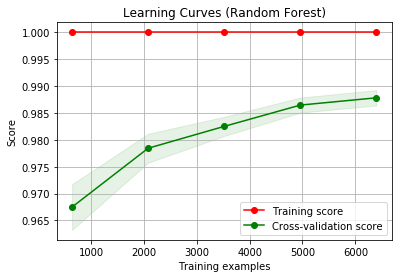

In [320]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using Randomized Search

In [321]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

In [322]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [323]:
clf = RandomForestClassifier()

In [324]:
param_space = {'n_estimators':stats.uniform(100, 1000), 'criterion':['gini', 'entropy'], 'max_features':stats.uniform(0.1, 1.0)}

In [330]:
rs = RandomizedSearchCV(clf, param_space, n_iter=100, cv=5)

In [331]:
rs.fit(X_train_scaled, y_train)

ValueError: The total space of parameters 30 is smaller than n_iter=100. For exhaustive searches, use GridSearchCV.

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


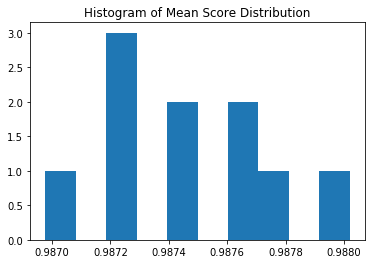

In [327]:
scores = pd.DataFrame(rs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [328]:
rs.best_score_

0.98801958537347645

In [329]:
rs.best_params_

{'criterion': 'entropy', 'max_features': 0.6, 'n_estimators': 200}

In [309]:
# last time
gs.best_score_

0.98979060318783207

In [310]:
# last time
gs.best_params_

{'criterion': 'gini', 'max_features': 0.6, 'n_estimators': 200}

In [311]:
#clf = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=15)
clf = RandomForestClassifier(criterion='gini', max_features=0.6, n_estimators=200)

In [312]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [313]:
clf.score(X_test_scaled, y_test)

0.99124999999999996

In [314]:
predictions = clf.predict(X_test_scaled)

In [315]:
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.99125


In [316]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1844    3]
 [  18  535]]


In [317]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1821,   26],
       [  57,  496]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}}


In [318]:
cm_dict.item().update({'random_forest':{'cm': cm, 'label': 'Random Forest' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1821,   26],
       [  57,  496]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}}


In [319]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1847
          1       0.99      0.97      0.98       553

avg / total       0.99      0.99      0.99      2400



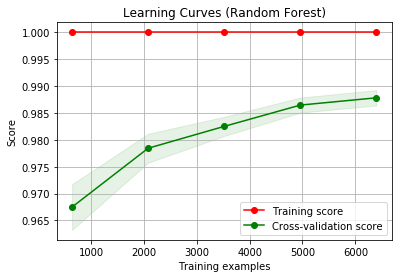

In [320]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()